In [1]:
pip install  facebook_scraper 


**Facebook Scrapper**

https://pypi.org/project/facebook-scraper/

Use comments as follows to get posts and images without using any account information such as user name password:

Install:

pip install facebook-scraper

Usage:

Send the unique page name as the first parameter and you're good to go:

>>> from facebook_scraper import get_posts

>>> for post in get_posts('nintendo', pages=1):
      print(post['text'][:50])

CLI usage

$ facebook-scraper --filename jacqueschirac_page_posts.csv --pages 1 JacquesChirac



**Alternatives and related projects**

facebook-post-scraper. Has comments. Uses Selenium.

facebook-scraper-selenium. "Scrape posts from any group or user into a .csv file without needing to register for any API access".

Ultimate Facebook Scraper. "Scrapes almost everything about a Facebook user's profile". Uses Selenium.

Unofficial APIs. List of unofficial APIs for various services, none for Facebook for now, but might be worth to check in the future.

major-scrapy-spiders. Has a profile spider for Scrapy.

facebook-page-post-scraper. Seems abandoned.


In [2]:
from facebook_scraper import get_posts

for post in get_posts('jchirac', pages=10):
    print(post['text'],'\n')

AFP.COM
Jacques Chirac est mort annonce sa famille à l'AFP 

BLOG.FONDATIONCHIRAC.EU
Blog de la Fondation Chirac 

FONDATIONCHIRAC.EU
Fondation Chirac » L’Appel de Cotonou - 12 octobre 2009 

FONDATIONCHIRAC.EU
Fondation Chirac » Les vidéos de la première réunion du Prix, 15 juin 2009 

FONDATIONCHIRAC.EU
Fondation Chirac 



In [34]:
app_id = 'xxxxxxxxxxxxxx'
app_secret = 'xxxxxxxxxxxxxxxxxxxxxxxx'
access_token = app_id + '|' + app_secret

In [35]:
page_id='jchirac'

In [30]:
import requests
import json
#method to fetch and parse page's data
def fbPageData(page_id, access_token):
    url = "https://graph.facebook.com/v2.4/{}/feed/?{}".format(page_id, access_token)
    data = json.loads(requests.get(url).content)
    return json.dumps(data, indent = 4, sort_keys = True)

In [40]:
# method to handle the exceptions and retry back after 10 seconds.
def getAbsoluteContent(url):
    flag = True
    i = 1
    while flag:
        try:
            response = requests.get(url)
            flag = False
        except Exception:
            time.sleep(10)
            print("Attemp {} failed, will be retrying after 10 seconds".format(i))
            i+=1
    return response.content
def fbPageData(page_id, access_token, n_counts = 10):
    params = "fields=message,link,created_time,type,name,id,\
                likes.limit(1).summary(true),\
                comments.limit(1).summary(true),\
    shares&limit={}&access_token={}".format(n_counts, access_token)
    url = "https://graph.facebook.com/v2.4/{}/feed/?{}".format(page_id, params)
    data = json.loads(getAbsoluteContent(url))
    return data

In [41]:
#Processing the scrapped data
def processPost(post):
    post_id = post['id']
    post_type = post['type'].encode('ascii', 'ignore')
    n_likes = 0 if 'likes' not in post.keys() else post['likes']\
    ['summary']['total_count']
    n_comments = 0 if 'comments' not in post.keys() else\
    post['comments']['summary']['total_count']
    n_shares = 0 if 'shares' not in post.keys() else post['shares']\
    ['count']
    post_message = '' if 'message' not in post.keys() else\
    post['message'].encode('ascii', 'ignore')
    link_name = '' if 'name' not in post.keys() else \
    post['name'].encode('ascii', 'ignore')
    post_link = '' if 'link' not in post.keys() else \
    post['link'].encode('ascii', 'ignore')
    post_published = dtetime.datetime.strptime(post['created_time']\
    ,'%Y-%m-%dT%H:%M:%S+0000')
    post_published = post_published + datetime.timedelta(hours=-5)
    post_published = post_published.strftime('%Y-%m-%d %H:%M:%S')
    return [post_id, post_message, n_likes, n_comments, n_shares,\
    link_name, post_type, post_link, post_published]

In [42]:
#Scrap post to get it in csv file
def scrapePosts(page_id, access_token):
    flag = True
    i = 1
    with open ("times_fd_data.csv", "w+") as fp:
        posts = fbPageData(page_id, access_token, 100)
        while flag:
            if i % 10 == 0:
                print ("Scraped {} Posts".format(i))
            for post in posts["data"]:
                temp = [*map(lambda x: str(x), processPost(post))]
                fp.write(",".join(temp))
                fp.write("\n")
            if 'paging' in posts.keys():
                post=json.loads(getAbsoluteContent(posts['paging']\
                ['next']))
            else:
                flag = False
            i += 1
            print ("we have scraped {} posts.".format(i*100))

In [43]:
print(fbPageData(page_id, access_token))

{'error': {'message': "(#10) This endpoint requires the 'pages_read_user_content' permission or the 'Page Public Content Access' feature. Refer to https://developers.facebook.com/docs/apps/review/login-permissions#manage-pages and https://developers.facebook.com/docs/apps/review/feature#reference-PAGES_ACCESS for details.", 'type': 'OAuthException', 'code': 10, 'fbtrace_id': 'AehqTjAS3v7U_lSLNQf20et'}}


In order to scrap the fb page content with 'jacques chirac' I have used APIFY https://apify.com/pocesar/facebook-pages-scraper

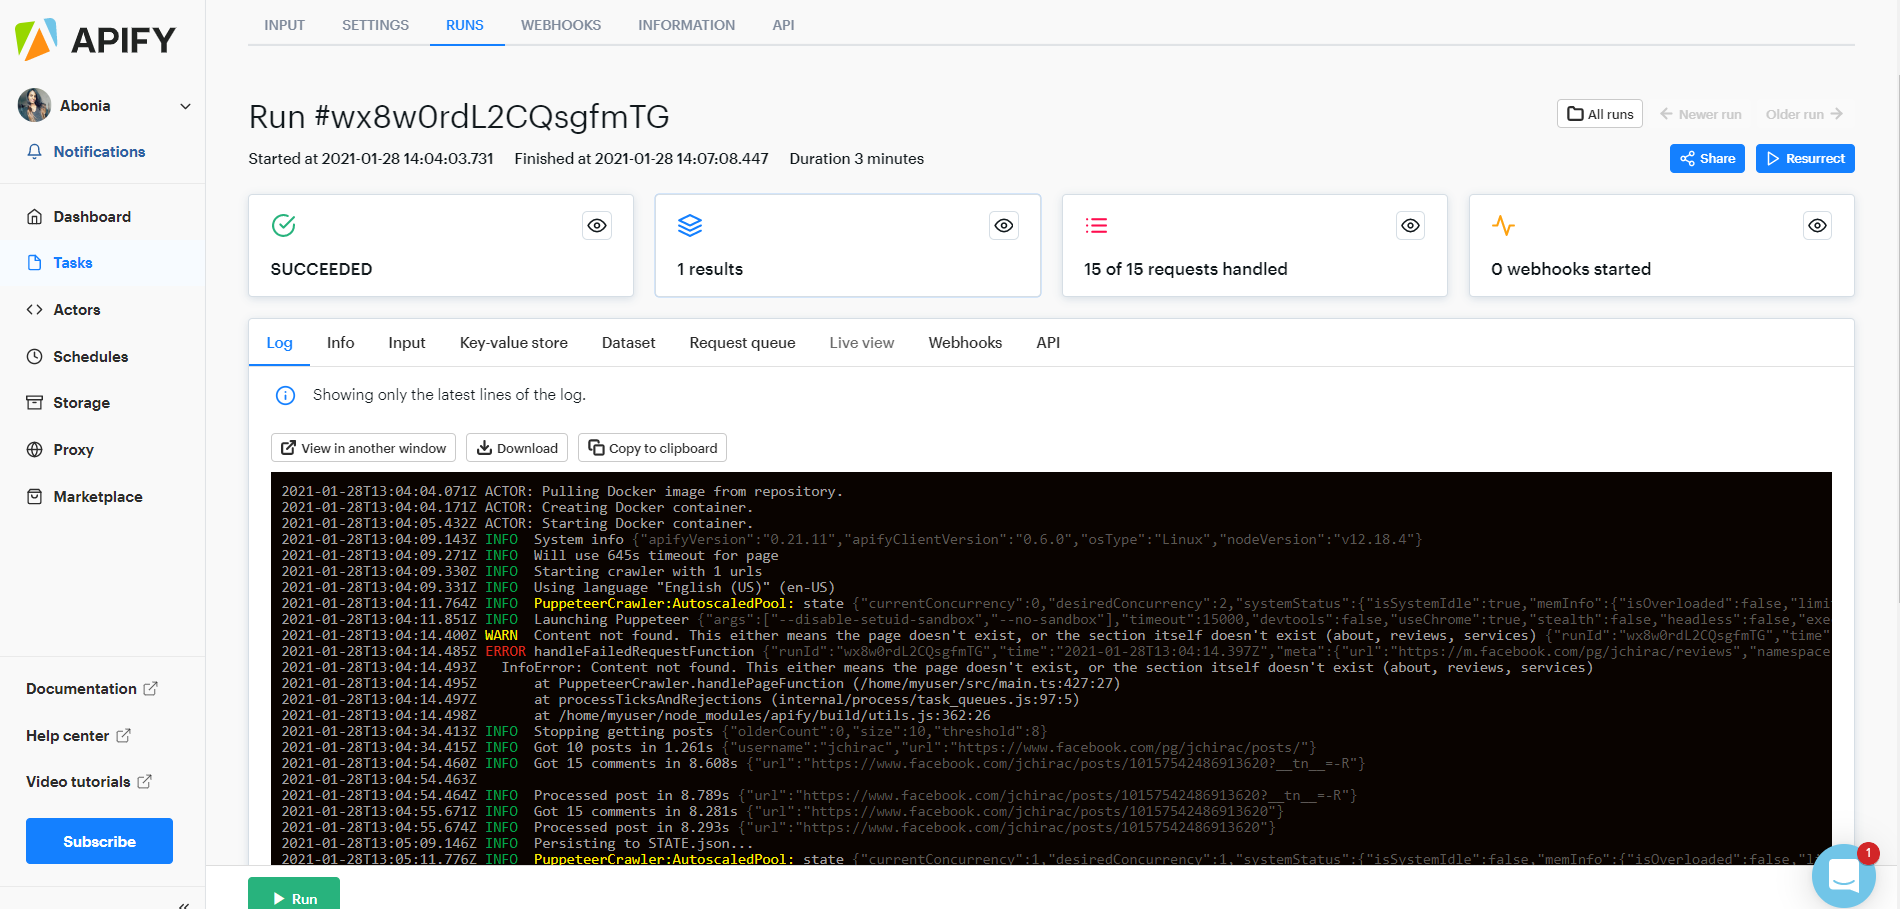

Instagram Scrapper
https://github.com/arc298/instagram-scraper

Use comments as follows to get posts and images without using any account information such as user name password:

Install:

pip install instagram-scraper

usage: 

instagram-scraper Jacques Chirac

instagram-scraper jacqueschirac --tag

Note: I have usede my terminal locally to collect images from instagram as below:
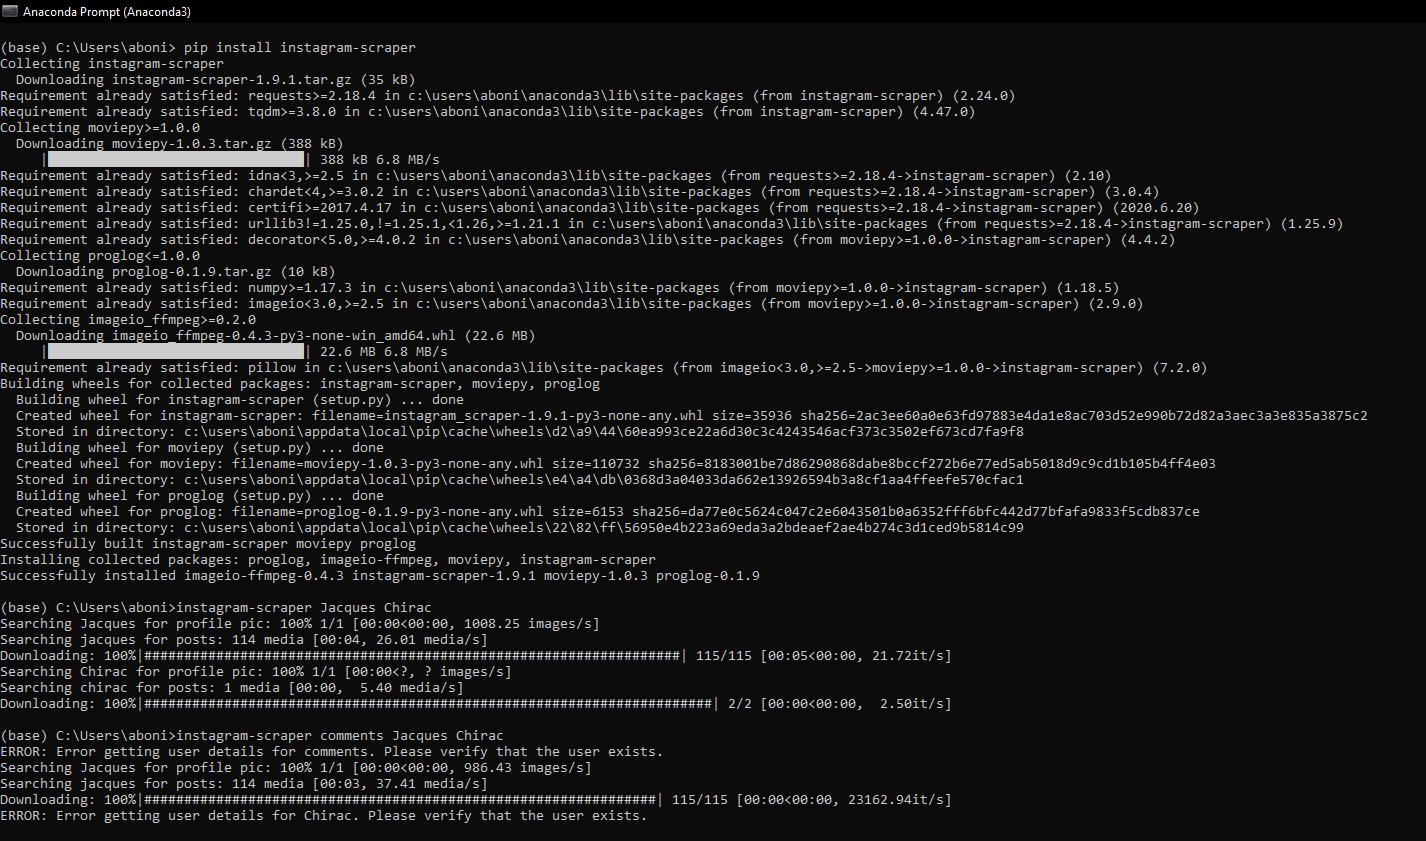